
# QUESTION 1

{accuracy: 10}
{reasoning: 2}

Train and tune a Random Forest Classifier and an SVM Classifier with an RBF kernel using a classification dataset of your choice. Perform hyperparameter tuning for both models and compare their performance (accuracy, confusion matrix, classification report) and computational efficiency (training time).

## Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import time
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load the dataset

Use the load_wine dataset from sklearn.datasets.
Specify X and y (features and the target variable)

In [ ]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Perform Train-Test Split

In [ ]:
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Initialize the Random Forest Classifier model and the SVM model

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

## Set up the parameters for tuning

Use n_estimators, max_depth, and min_samples_split for the parameters of random forest classifier.

Use C and gamma for the parameters of SVM model.

In [ ]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)


## Perform hyperparameter tuning for Random Forest using GridSearchCV


In [ ]:
# Defining hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing the model
rf = RandomForestClassifier(random_state=42)

# Performing GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=1)
start_time = time.time()
grid_search.fit(df.drop(columns=['target']), df['target'])
end_time = time.time()

# printing out the best paramaters and timings
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Training Time: {end_time - start_time:.2f} seconds")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Training Time: 87.16 seconds


## Perform hyperparameter tuning for SVM with RBF kernel using GridSearchCV

In [ ]:
# Defining hyperparameter grid for SVM with RBF kernel
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

# Initializing the SVM model
svm_rbf = SVC(kernel='rbf', random_state=42)

# Performing GridSearchCV
grid_search_svm = GridSearchCV(svm_rbf, param_grid_svm, cv=5, n_jobs=-1, verbose=1)
start_time_svm = time.time()
grid_search_svm.fit(df.drop(columns=['target']), df['target'])
end_time_svm = time.time()

# Printing out the best parameters and timings
print(f"Best Parameters for SVM: {grid_search_svm.best_params_}")
print(f"Training Time for SVM: {end_time_svm - start_time_svm:.2f} seconds")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters for SVM: {'C': 100, 'gamma': 0.001}
Training Time for SVM: 0.70 seconds


## Display the predictions and evaluations

In [ ]:
# Predictions and evaluation

# Making predictions using the best Random Forest model
rf_best = grid_search.best_estimator_
rf_predictions = rf_best.predict(df.drop(columns=['target']))

# Making predictions using the best SVM model
svm_best = grid_search_svm.best_estimator_
svm_predictions = svm_best.predict(df.drop(columns=['target']))

# Print the accuracy, confusion matrix, and the classification report for Random Forest
print("Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(df['target'], rf_predictions):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(df['target'], rf_predictions))
print("Classification Report:")
print(classification_report(df['target'], rf_predictions))

# Print the accuracy, confusion matrix, and the classification report for RBF kernel SVM
print("\nSVM (RBF Kernel) Model Evaluation:")
print(f"Accuracy: {accuracy_score(df['target'], svm_predictions):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(df['target'], svm_predictions))
print("Classification Report:")
print(classification_report(df['target'], svm_predictions))


Random Forest Model Evaluation:
Accuracy: 1.0000
Confusion Matrix:
[[59  0  0]
 [ 0 71  0]
 [ 0  0 48]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        48

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178


SVM (RBF Kernel) Model Evaluation:
Accuracy: 1.0000
Confusion Matrix:
[[59  0  0]
 [ 0 71  0]
 [ 0  0 48]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        48

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00  

## Display which model is faster

In [ ]:
# Display which model is faster

if (end_time - start_time) < (end_time_svm - start_time_svm):
    print("Random Forest was faster.")
else:
    print("SVM with RBF kernel was faster.")

print(f"Random Forest Training Time: {end_time - start_time:.2f} seconds")
print(f"SVM Training Time: {end_time_svm - start_time_svm:.2f} seconds")


SVM with RBF kernel was faster.
Random Forest Training Time: 87.16 seconds
SVM Training Time: 0.70 seconds


# QUESTION 2

Implement and visualize the decision boundaries for three different SVM kernels (Linear, Polynomial, and RBF) using a synthetic 2D dataset. After that, apply a handcrafted feature expansion to transform the dataset into a higher-dimensional space and train a linear SVM on this transformed data. Visualize the decision boundary in the original 2D space, and discuss the impact of the different kernels and feature expansion on the separability of the data.

## Importing necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_circles, make_moons

## Generate synthetic 2D dataset with non-linear patterns

Use the inbuilt make_moons dataset to generate the synthetic 2D dataset

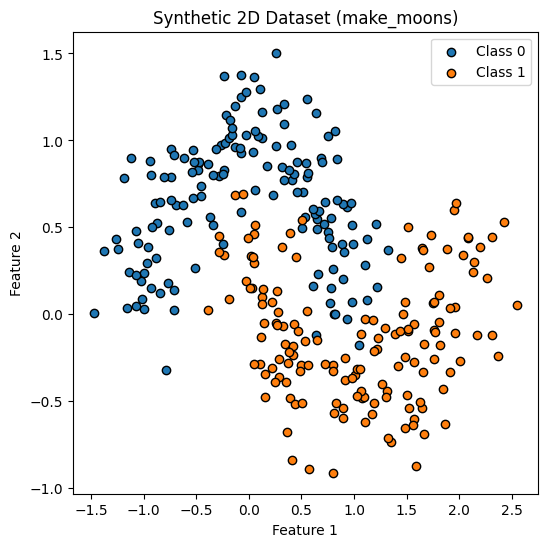

In [ ]:
# Generate synthetic 2D dataset with non-linear patterns
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# Plot the dataset
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class 0", edgecolors='k')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class 1", edgecolors='k')  # Corrected this line
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic 2D Dataset (make_moons)")
plt.legend()
plt.show()


## Create a function to plot decision boundaries for a classifier

{accuracy: 5}

In [ ]:
def plot_decision_boundaries(X, y, clf, title, feature_transform=None):
    # Initialize the step size in the mesh for plotting
    h = 0.02  # Step size in the mesh

    # Define the grid range based on the dataset
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # This if-else block is executed when feature transformation is performed
    if feature_transform:
        grid_points = feature_transform(np.c_[xx.ravel(), yy.ravel()])
    else:
        grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Predict class labels for each point in the grid
    Z = clf.predict(grid_points)
    Z = Z.reshape(xx.shape)

    # Ensure figure rendering before plotting
    plt.figure(figsize=(6, 6))

    # Plot the decision boundary as a contour plot
    plt.contourf(xx, yy, Z, alpha=0.3, levels=np.linspace(Z.min(), Z.max(), 50), cmap=plt.cm.coolwarm)

    # Plot the scatter plot of the actual data points on top
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.show()



## Train an SVM classifier with a linear kernel and plot the decision boundary for the same

{accuracy: 2}

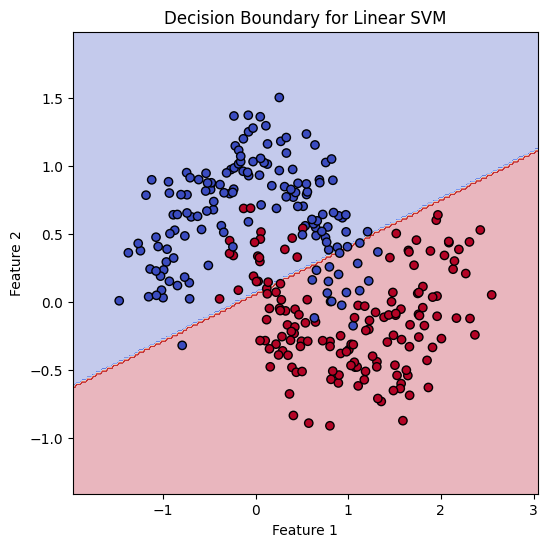

In [ ]:
# Train an SVM classifier with a linear kernel
svm_linear = svm.SVC(kernel="linear", random_state=42)
svm_linear.fit(X, y)

# Plot decision boundary
plot_decision_boundaries(X, y, svm_linear, title="Decision Boundary for Linear SVM")


## Train an SVM classifier with a polynomial kernel of degree 3 and plot the decision boundary for the same

{accuracy: 2}

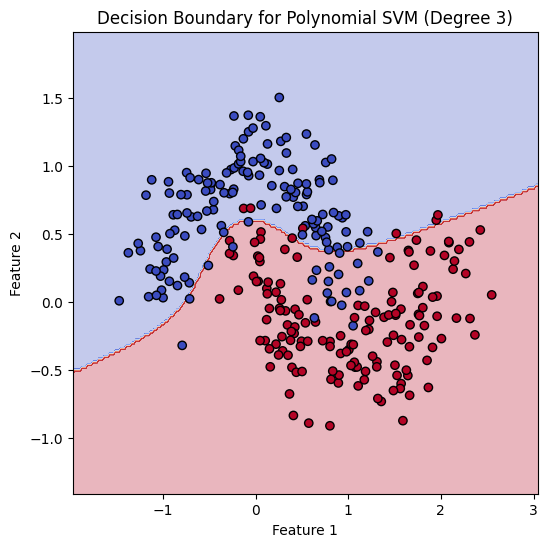

In [ ]:
# Train an SVM classifier with a polynomial kernel of degree 3
svm_poly = SVC(kernel="poly", degree=3, C=1.0, random_state=42)
svm_poly.fit(X, y)

# Plot the decision boundary for the polynomial SVM
plot_decision_boundaries(X, y, svm_poly, title="Decision Boundary for Polynomial SVM (Degree 3)")


## Train an SVM classifier with an RBF (Gaussian) kernel and plot the decision boundary for the same

{accuracy 2}

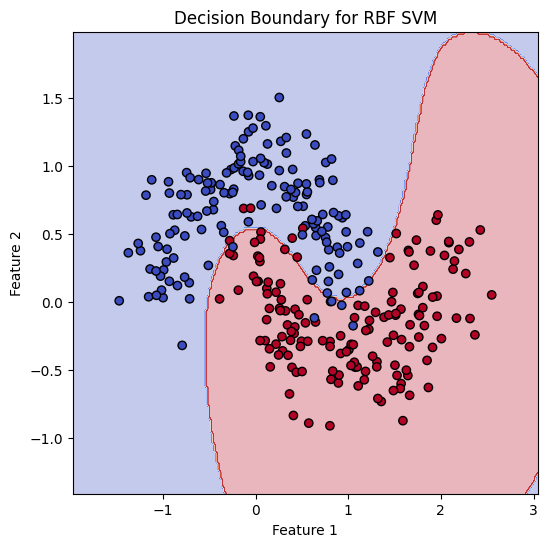

In [ ]:
# Train an SVM classifier with an RBF (Gaussian) kernel
svm_rbf = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
svm_rbf.fit(X, y)

# Plot the decision boundary for the RBF SVM
plot_decision_boundaries(X, y, svm_rbf, title="Decision Boundary for RBF SVM")


## Handcrafted Feature Expansion

{accuracy: 3}

### Use Polynomial Features to manually expand the feature space (degree 3)

In [ ]:
# Handcrafted Feature Expansion using Polynomial Features (degree 3)
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

# Print the new feature space shape
print(f"Original Feature Shape: {X.shape}")
print(f"Expanded Feature Shape: {X_poly.shape}")


Original Feature Shape: (300, 2)
Expanded Feature Shape: (300, 9)


### Now, train an SVM classifier with a linear kernel on the expanded feature set

In [ ]:
# Train an SVM classifier with a linear kernel on the expanded feature set
svm_linear_expanded = SVC(kernel="linear", C=1.0, random_state=42)
svm_linear_expanded.fit(X_poly, y)

# Print confirmation
print("SVM with linear kernel trained on expanded feature set.")


SVM with linear kernel trained on expanded feature set.


### Plot the decision boundary in the original 2D space

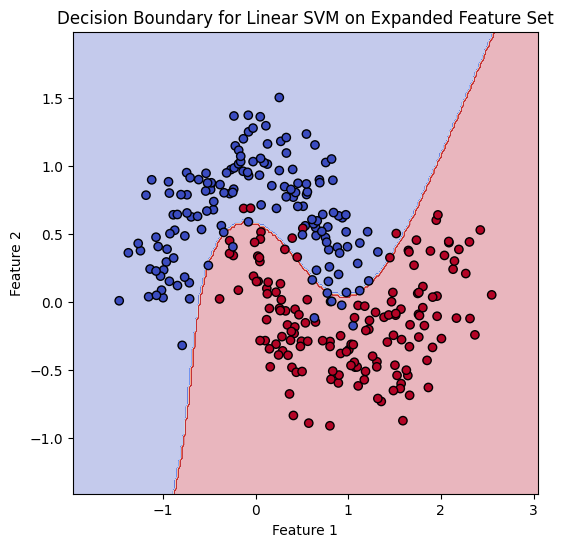

In [ ]:
# Define a function to apply the same polynomial transformation to the mesh grid points
def poly_transform(points):
    return poly.transform(points)

# Plot the decision boundary in the original 2D space
plot_decision_boundaries(X, y, svm_linear_expanded,
                         title="Decision Boundary for Linear SVM on Expanded Feature Set",
                         feature_transform=poly_transform)


# QUESTION 3

{reasoning: 5}



Consider a dataset $\{(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)\}$ where $x_i \in \mathbb{R}^2$ and $y_i \in \{+1, -1\}$. Suppose we want to apply the kernel trick to a Support Vector Machine (SVM) to classify the data, and we choose to use the polynomial kernel of degree 2:

$$
K(x, x') = (x \cdot x' + 1)^2
$$

1. **Feature Mapping:**
   - Compute the feature mapping $\phi(x)$ corresponding to the polynomial kernel $K(x, x')$. Specifically, find the transformation $\phi: \mathbb{R}^2 \rightarrow \mathbb{R}^6$ that corresponds to this kernel function.

2. **Kernel Matrix:**
   - Given the following points $x_1 = (1, 2)$ and $x_2 = (3, 4)$, construct the kernel matrix $K$ for these two points. Show the steps involved in calculating each entry of the matrix using the given polynomial kernel.

3. **Decision Function:**
   - Suppose the SVM decision function is expressed in the feature space as $f(x) = w \cdot \phi(x) + b$, where $w$ and $b$ are learned parameters. Explain how the decision function in the original space can be derived using the kernel function.


## Solution

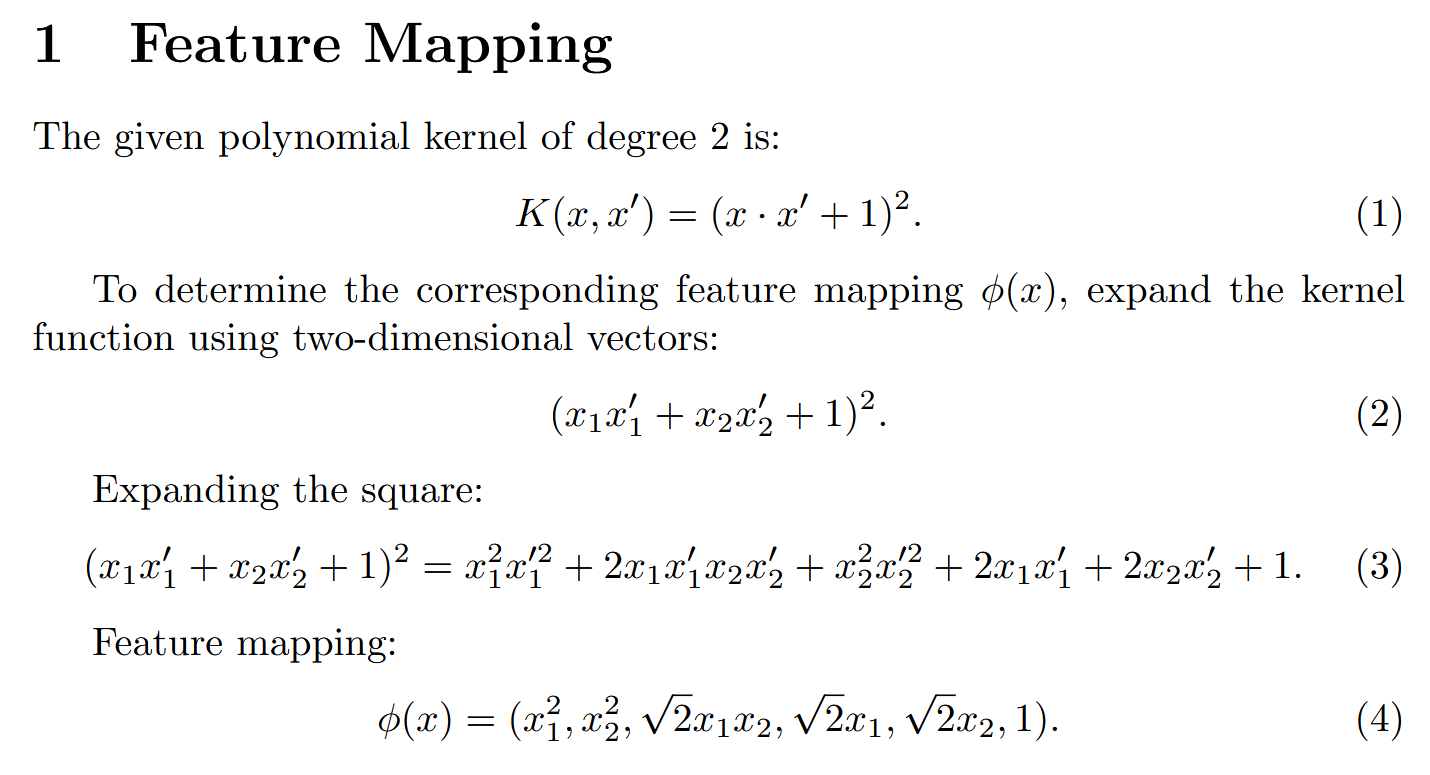Add your solution here

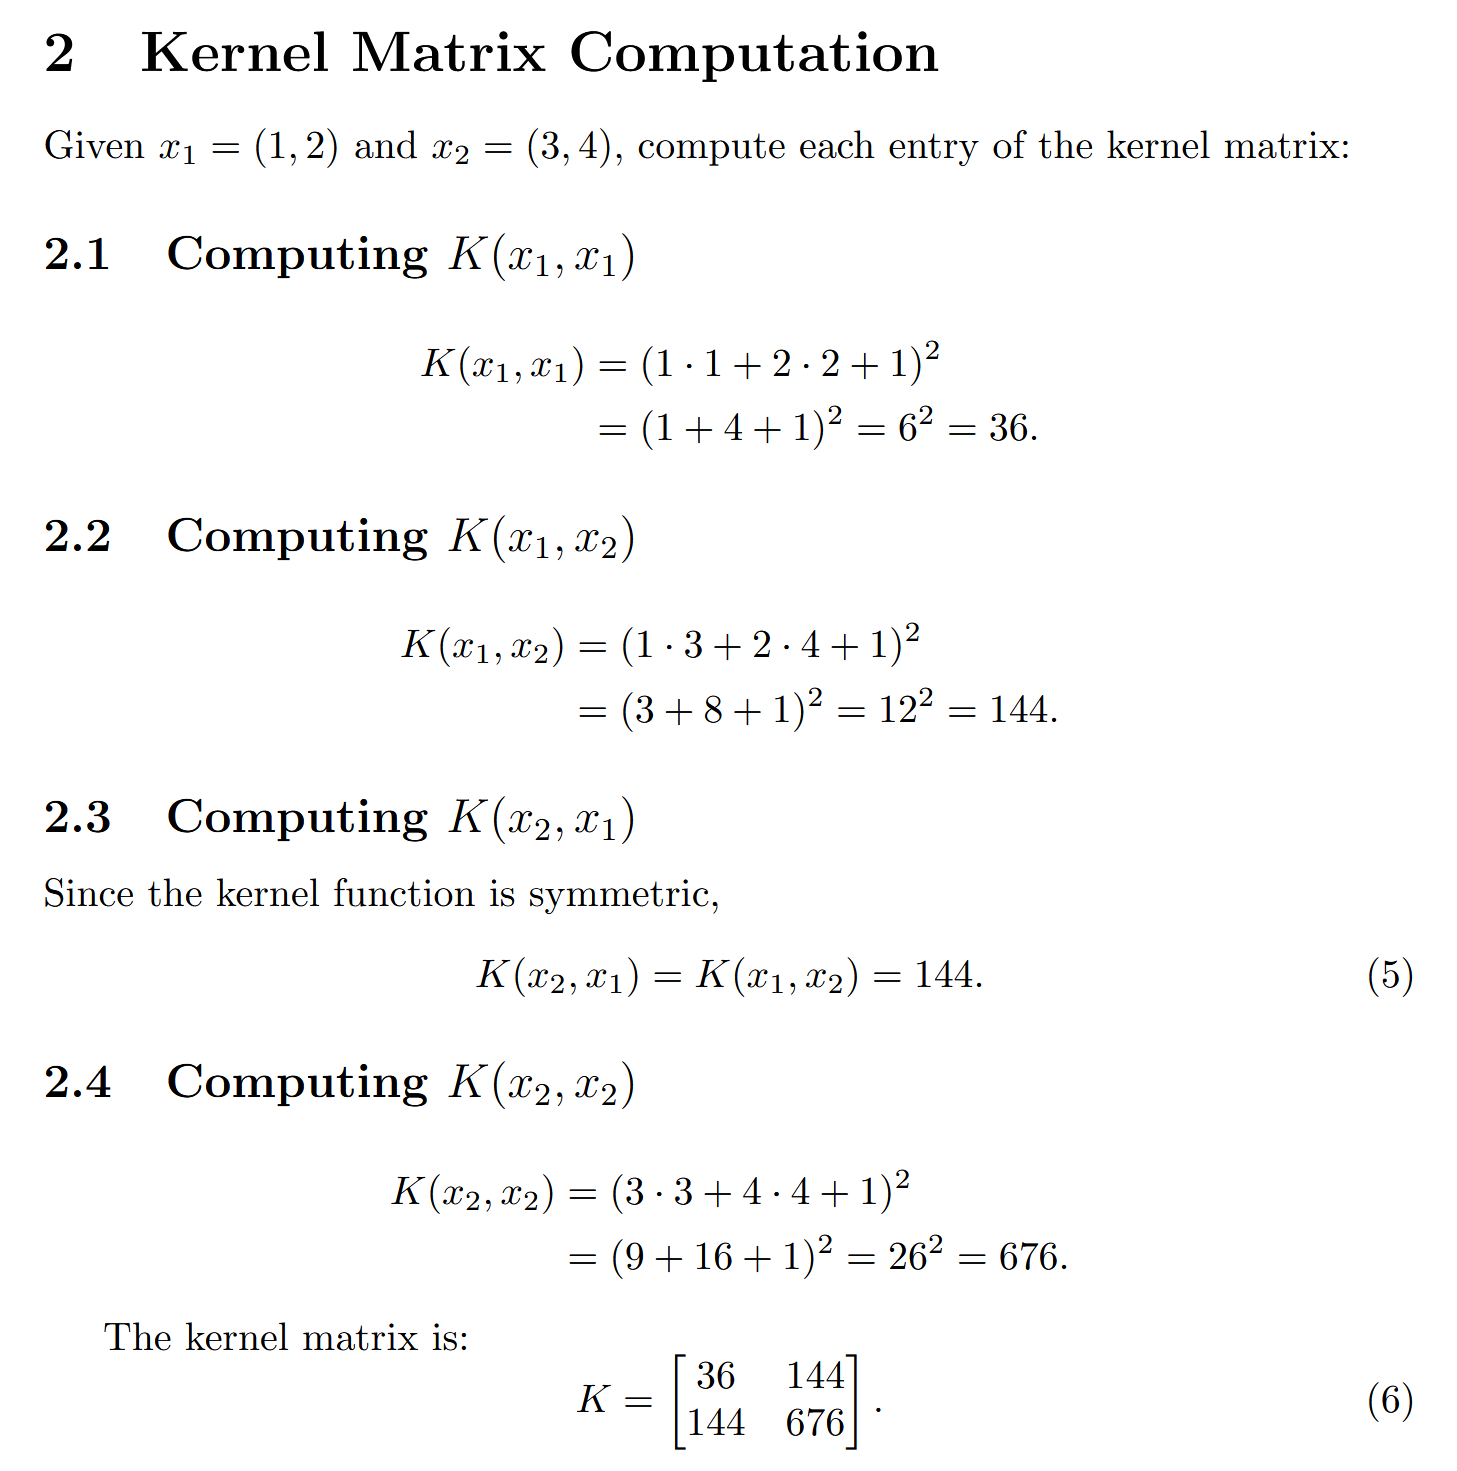

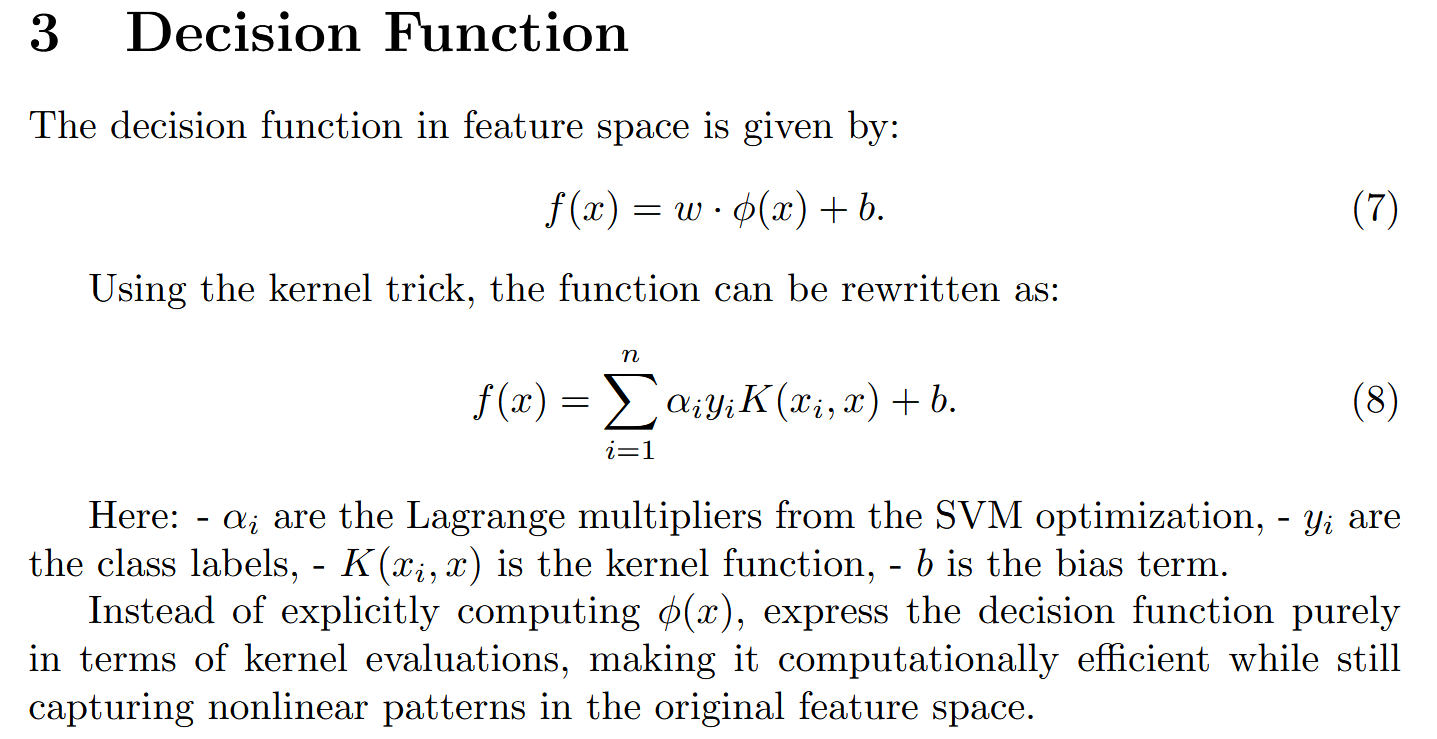